In [3]:
import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow import keras

import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print(' ')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Classified label')
    plt.tight_layout()

DATA PREPARATION

In [5]:
normal_data= pd.read_csv('G:/Semester 8/TA/DWT/Win32/Debug/Decompose/normal_dataset.csv', header=None)
abnormal_data = pd.read_csv('G:/Semester 8/TA/DWT/Win32/Debug/Decompose/ischemia_dataset.csv', header=None)
data_frame = pd.concat([normal_data, abnormal_data], axis=0).sample(frac=1, random_state=15)
data_frame = data_frame.rename({250: 'Class'}, axis=1)
data_frame

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Class
390,-0.2780,-0.349,-0.4160,-0.47800,-0.53100,-0.5740,-0.6080,-0.6300,-0.6390,-0.6350,...,0.2870,0.3180,0.3460,0.36800,0.38600,0.3980,0.4040,0.4030,0.4030,0.0
401,0.1620,0.176,0.1910,0.20400,0.21700,0.2290,0.2390,0.2460,0.2520,0.2560,...,0.3080,0.2860,0.2640,0.24400,0.22600,0.2100,0.1960,0.1850,0.1850,0.0
986,0.8060,0.651,0.4870,0.31600,0.13900,-0.0423,-0.2250,-0.4060,-0.5830,-0.7550,...,1.3800,1.3900,1.3900,1.40000,1.41000,1.4200,1.4400,1.4600,1.4600,1.0
1501,-0.6340,-0.525,-0.4210,-0.32300,-0.23300,-0.1510,-0.0777,-0.0126,0.0446,0.0943,...,-1.3000,-1.4400,-1.5700,-1.67000,-1.75000,-1.8100,-1.8400,-1.8500,-1.8500,1.0
847,0.2870,0.323,0.3550,0.38200,0.40300,0.4160,0.4210,0.4160,0.4010,0.3740,...,0.1460,0.1750,0.2040,0.23500,0.26500,0.2960,0.3240,0.3500,0.3500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.3370,0.345,0.3450,0.33700,0.32100,0.2960,0.2620,0.2210,0.1710,0.1140,...,0.0601,0.0666,0.0737,0.08130,0.08850,0.0957,0.1030,0.1110,0.1110,1.0
1481,-0.4070,-0.358,-0.2970,-0.22300,-0.13700,-0.0410,0.0640,0.1760,0.2960,0.4220,...,-0.4640,-0.5180,-0.5630,-0.59700,-0.62000,-0.6310,-0.6280,-0.6120,-0.6120,1.0
970,0.2810,0.236,0.1830,0.12300,0.05660,-0.0137,-0.0862,-0.1590,-0.2330,-0.3050,...,0.0243,0.0341,0.0438,0.05270,0.06080,0.0687,0.0766,0.0848,0.0848,1.0
1198,1.5100,1.530,1.5400,1.54000,1.54000,1.5300,1.5000,1.4600,1.4100,1.3400,...,-0.8370,-0.5440,-0.2600,0.00867,0.25600,0.4810,0.6810,0.8580,0.8580,1.0


In [6]:
train_data, val_data = train_test_split(data_frame, test_size=0.15)

X_train = train_data.loc[:, train_data.columns != 'Class']
Y_train = train_data.loc[:, train_data.columns == 'Class']
Y_train = to_categorical(Y_train)

X_val = val_data.loc[:, val_data.columns != 'Class']
Y_val = val_data.loc[:, val_data.columns == 'Class']
Y_val = to_categorical(Y_val)

print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)

(2645, 250)
(2645, 2)
(467, 250)
(467, 2)


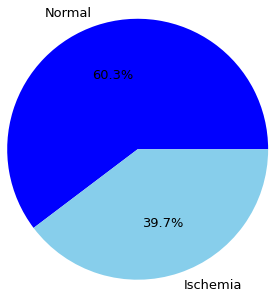

In [7]:
train_size = train_data['Class'].value_counts()
plt.pie(train_size, labels=['Normal','Ischemia'], colors=['blue','skyblue'],autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 13})
p=plt.gcf()
plt.show()

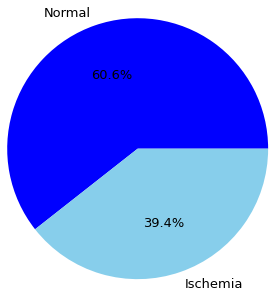

In [8]:
val_size = val_data['Class'].value_counts()
plt.pie(val_size, labels=['Normal','Ischemia'], colors=['blue','skyblue'],autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 13})
p=plt.gcf()
plt.show()

MODEL ARCHITECTURE

In [24]:
"""ann_model = Sequential()
ann_model.add(Dense(32, activation='relu', input_shape=(250,)))
ann_model.add(Dense(24, activation='relu'))
ann_model.add(Dense(2, activation='softmax'))
ann_model.summary()"""

ann_model =  tf.keras.Sequential([
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

TRAINING SESSION

In [25]:
my_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = ann_model.fit(
    X_train,Y_train,
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=300,
    callbacks=[my_callbacks]
)

Epoch 1/300
83/83 [==============================] - 2s 13ms/step - loss: 0.6816 - accuracy: 0.5592 - val_loss: 0.6660 - val_accuracy: 0.5782
Epoch 2/300
83/83 [==============================] - 1s 9ms/step - loss: 0.6597 - accuracy: 0.5784 - val_loss: 0.6490 - val_accuracy: 0.5910
Epoch 3/300
83/83 [==============================] - 1s 8ms/step - loss: 0.6424 - accuracy: 0.5917 - val_loss: 0.6345 - val_accuracy: 0.6081
Epoch 4/300
83/83 [==============================] - 1s 7ms/step - loss: 0.6280 - accuracy: 0.6034 - val_loss: 0.6232 - val_accuracy: 0.6188
Epoch 5/300
83/83 [==============================] - 2s 19ms/step - loss: 0.6160 - accuracy: 0.6098 - val_loss: 0.6126 - val_accuracy: 0.6296
Epoch 6/300
83/83 [==============================] - 1s 7ms/step - loss: 0.6053 - accuracy: 0.6189 - val_loss: 0.6031 - val_accuracy: 0.6296
Epoch 7/300
83/83 [==============================] - 1s 8ms/step - loss: 0.5956 - accuracy: 0.6276 - val_loss: 0.5946 - val_accuracy: 0.6296
Epoch 8/300

In [23]:
input_layer = ann_model.layers[0]
hidden1_layer = ann_model.layers[1]
hidden2_layer = ann_model.layers[2]
output_layer = ann_model.layers[3]

IndexError: list index out of range

In [17]:
print(f'Input layer weight = {input_layer.weights}, bias = {input_layer.bias}')
np.set_printoptions(threshold=250)

Input layer weight = [<tf.Variable 'dense_7/kernel:0' shape=(250, 250) dtype=float32, numpy=
array([[ 0.04216437, -0.0719926 ,  0.03299098, ...,  0.02914182,
        -0.07120784, -0.02031782],
       [ 0.10263525,  0.0218025 , -0.00603664, ..., -0.0419414 ,
        -0.08561548, -0.0877244 ],
       [ 0.0920156 , -0.03836206,  0.0523917 , ...,  0.08115695,
         0.00251688,  0.09834214],
       ...,
       [-0.07001663,  0.02712188, -0.10466163, ..., -0.06963941,
        -0.04716859,  0.01701181],
       [ 0.08067505,  0.09839465, -0.01620862, ...,  0.0450343 ,
         0.055593  ,  0.05189253],
       [-0.10414049,  0.06957749, -0.02713029, ..., -0.03503192,
         0.01600716, -0.01534771]], dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(250,) dtype=float32, numpy=
array([ 0.01997662, -0.01090479, -0.02085827,  0.00852118,  0.00613859,
       -0.01721651, -0.02592171, -0.00686056, -0.02229764,  0.02273279,
        0.00573783, -0.02238072,  0.0131564 , -0.02202575,  0.037865

In [18]:
print(f'Hiden layer 1 weight = {hidden1_layer.weights} , bias = {hidden1_layer.bias}')

Hiden layer 1 weight = [<tf.Variable 'dense_8/kernel:0' shape=(250, 32) dtype=float32, numpy=
array([[-0.03269333,  0.0234452 ,  0.0767148 , ..., -0.08991674,
        -0.00687358,  0.08963216],
       [-0.05243275, -0.11747327,  0.1441902 , ..., -0.16191387,
         0.07316972, -0.06982035],
       [-0.00664716,  0.07592143, -0.10902044, ..., -0.07273607,
        -0.05860798, -0.04464012],
       ...,
       [ 0.01241307, -0.03746434, -0.05274072, ...,  0.03945528,
        -0.15545154,  0.08475408],
       [-0.01194788,  0.0449664 ,  0.13094519, ...,  0.01508602,
        -0.09270467,  0.10223064],
       [ 0.10602156,  0.05505202, -0.01666432, ..., -0.15000144,
         0.01665577, -0.11651841]], dtype=float32)>, <tf.Variable 'dense_8/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.00443052, -0.01186152, -0.01357059, -0.0152674 ,  0.03284128,
        0.02780858, -0.02238415, -0.01168999,  0.03240377,  0.02489306,
       -0.03522491,  0.03314475, -0.00376081,  0.03297679,  0.028903

In [19]:
print(f'Hiden layer 1 weight = {hidden2_layer.weights} , bias = {hidden2_layer.bias}')

Hiden layer 1 weight = [<tf.Variable 'dense_9/kernel:0' shape=(32, 24) dtype=float32, numpy=
array([[-0.23833433,  0.20055476, -0.15873909, ...,  0.00960929,
        -0.02950124,  0.00976337],
       [ 0.30163693, -0.22528793, -0.22236997, ..., -0.04051098,
        -0.07000002,  0.01110557],
       [ 0.16201605, -0.23711936, -0.18044893, ..., -0.22095428,
        -0.09009801,  0.22423612],
       ...,
       [ 0.1993708 ,  0.34006566, -0.07374707, ..., -0.19499317,
         0.3611136 , -0.13957953],
       [ 0.08693725,  0.14877236,  0.21145657, ..., -0.06299525,
        -0.16208835,  0.33461276],
       [ 0.24465708,  0.02497339,  0.26779535, ...,  0.25219512,
         0.05564144, -0.06786401]], dtype=float32)>, <tf.Variable 'dense_9/bias:0' shape=(24,) dtype=float32, numpy=
array([ 0.02395286,  0.03260101,  0.00539384, -0.00381272,  0.03397174,
        0.03049255, -0.01978642, -0.00801764,  0.03354913,  0.02158928,
       -0.00044944,  0.05169353,  0.02186613,  0.00797513,  0.0476740

In [20]:
print(f'Hiden layer 1 weight = {output_layer.weights} , bias = {output_layer.bias}')

Hiden layer 1 weight = [<tf.Variable 'dense_10/kernel:0' shape=(24, 2) dtype=float32, numpy=
array([[ 0.07454661, -0.37252495],
       [ 0.353633  , -0.11466872],
       [ 0.43768564,  0.07770465],
       [ 0.32650125, -0.07277416],
       [-0.3189505 ,  0.47019172],
       [ 0.3432529 , -0.16786876],
       [-0.3580363 ,  0.44413197],
       [-0.52767307,  0.07178875],
       [ 0.06911577,  0.4867659 ],
       [-0.4301713 ,  0.4320992 ],
       [-0.19932663,  0.05565277],
       [ 0.14916109, -0.36812153],
       [ 0.50506234, -0.12830065],
       [-0.13881905, -0.4741527 ],
       [ 0.5416984 ,  0.19656062],
       [-0.04552079, -0.4142028 ],
       [-0.31446218,  0.15482982],
       [ 0.30900222,  0.06925964],
       [ 0.5048343 , -0.22018097],
       [ 0.23218514,  0.02022821],
       [ 0.5597897 , -0.5102058 ],
       [ 0.16850498,  0.4612493 ],
       [ 0.01694711, -0.585402  ],
       [ 0.5503963 , -0.25661406]], dtype=float32)>, <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=f

VISUALIZATION

Text(0.5, 1.0, 'Training and Validation Loss')

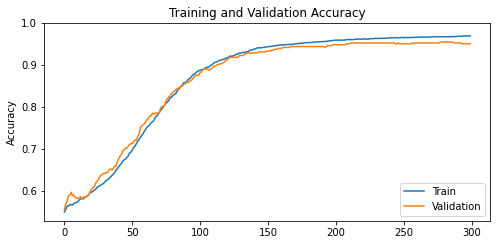

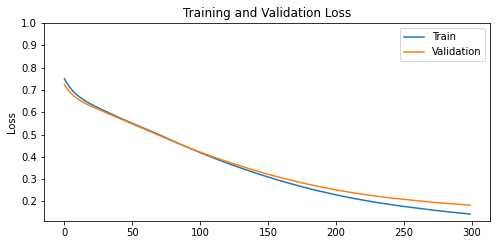

In [ ]:
# visualize the training acc history
my_acc = history.history['accuracy']
my_val_acc = history.history['val_accuracy']

# plot accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.plot(my_acc, label='Train')
plt.plot(my_val_acc, label='Validation')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# visualize the loss training history
my_loss = history.history['loss']
my_val_loss = history.history['val_loss']

# plot loss
plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.plot(my_loss, label='Train')
plt.plot(my_val_loss, label='Validation')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Loss')

TESTING SESSION

In [ ]:
test_data = pd.read_csv('G:/Semester 8/TA/DWT/Win32/Debug/Decompose/test_dataset.csv', header=None).sample(frac=1, random_state=15)
test_frame = test_data.rename({250: 'Class'}, axis=1)
test_frame

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Class
428,-2.15000,-2.15000,-2.120,-2.050,-1.940,-1.8000,-1.6300,-1.4300,-1.220,-0.9960,...,-0.625,-0.887,-1.130,-1.340,-1.5200,-1.65000,-1.7500,-1.810,-1.810,0.0
125,0.21200,0.27300,0.329,0.381,0.428,0.4680,0.5020,0.5310,0.552,0.5690,...,-0.164,-0.178,-0.199,-0.225,-0.2550,-0.28800,-0.3230,-0.358,-0.358,1.0
191,-0.37100,-0.41900,-0.459,-0.489,-0.507,-0.5140,-0.5070,-0.4860,-0.449,-0.3980,...,0.459,0.483,0.502,0.516,0.5210,0.51800,0.5060,0.485,0.485,1.0
336,-0.00481,0.05990,0.118,0.170,0.216,0.2550,0.2880,0.3160,0.339,0.3550,...,-1.250,-1.310,-1.350,-1.380,-1.3900,-1.38000,-1.3600,-1.320,-1.320,0.0
524,0.31800,0.30400,0.290,0.277,0.264,0.2540,0.2470,0.2410,0.237,0.2340,...,0.667,0.716,0.761,0.803,0.8450,0.88800,0.9290,0.970,0.970,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-0.12200,-0.00496,0.123,0.262,0.414,0.5780,0.7520,0.9340,1.120,1.3000,...,-0.383,-0.429,-0.468,-0.500,-0.5250,-0.54200,-0.5490,-0.545,-0.545,1.0
199,-2.25000,-2.55000,-2.800,-2.990,-3.110,-3.1700,-3.1700,-3.0900,-2.970,-2.7800,...,0.165,-0.141,-0.473,-0.825,-1.1900,-1.56000,-1.9200,-2.250,-2.250,1.0
156,-0.41700,-0.36200,-0.300,-0.233,-0.162,-0.0897,-0.0178,0.0524,0.120,0.1840,...,-0.373,-0.310,-0.240,-0.165,-0.0873,-0.00763,0.0728,0.152,0.152,1.0
384,0.76500,0.79800,0.828,0.857,0.886,0.9160,0.9460,0.9770,1.010,1.0300,...,-1.650,-1.630,-1.580,-1.490,-1.3700,-1.22000,-1.0500,-0.850,-0.850,0.0


In [ ]:
X_test = test_frame.loc[:, test_frame.columns != 'Class']
Y_test = test_frame.loc[:, test_frame.columns == 'Class']
Y_test = to_categorical(Y_test)

print(X_test.shape)
print(Y_test.shape)

(549, 250)
(549, 2)


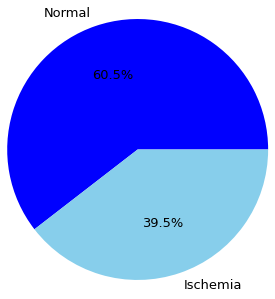

In [ ]:
test_size = test_frame['Class'].value_counts()
plt.pie(test_size, labels=['Normal','Ischemia'], colors=['blue','skyblue'],autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 13})
p=plt.gcf()
plt.show()

In [ ]:
hasil_evaluasi = ann_model.evaluate(X_test, Y_test, batch_size=32)
print()
print("Validation Accuracy: {:.2f}%".format(hasil_evaluasi[1] * 100))
print("    Validation Loss: {:.2f}%".format(hasil_evaluasi[0] * 100))
print()

18/18 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9727

Validation Accuracy: 97.27%
    Validation Loss: 10.64%



Confusion matrix, without normalization
[[207  10]
 [  5 327]]
 


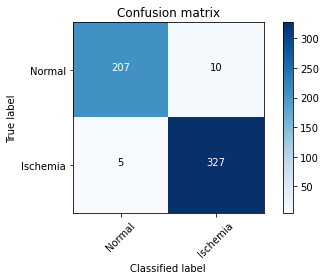

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       217
           1       0.97      0.98      0.98       332

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549



In [ ]:
Y_pred = ann_model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)
Y_true = np.argmax(Y_test,axis=1)
cm = confusion_matrix(Y_true,Y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=['Normal', 'Ischemia'])
plt.show()
print(classification_report(Y_true,Y_pred))

SAVED MODEL

In [ ]:
model_file_name = 'decompose_model'
c_model_name = 'decompose_model'
ann_model.save(model_file_name + '.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(ann_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(model_file_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ACHMAD~1\AppData\Local\Temp\tmpun3dwo3x\assets


INFO:tensorflow:Assets written to: C:\Users\ACHMAD~1\AppData\Local\Temp\tmpun3dwo3x\assets


13536

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))